**Modelación del aprendizaje con inteligencia artificial**

In [ ]:
import numpy as np
import pandas as pd

# Cargamos los datasets
features = pd.read_csv('kmeans_features.csv')
labels = pd.read_csv('kmeans_labels.csv')

# Vemos las primeras filas de los datasets
print("Features dataset:")
print(features.head())

print("\nLabels dataset:")
print(labels.head())


Features dataset:
   feature_1  feature_2
0  -0.688159  -1.545588
1  -1.256858   0.748776
2   1.936089  -0.274013
3  -0.134706   0.876875
4   0.229746   1.217300

Labels dataset:
  Unnamed: 0  cluster
0   sample_1        2
1   sample_2        3
2   sample_3        1
3   sample_4        0
4   sample_5        0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Estandarizamos los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Verificamos que la estandarización se haya realizado correctamente
print("Datos estandarizados (primeras filas):")
print(features_scaled[:5])


Datos estandarizados (primeras filas):
[[-0.68815934 -1.54558762]
 [-1.2568579   0.74877574]
 [ 1.93608945 -0.27401296]
 [-0.13470609  0.8768751 ]
 [ 0.22974638  1.21730007]]


In [ ]:
from sklearn.decomposition import PCA

# Aplicamos PCA para reducir a 2 dimensiones (o 3 si es necesario)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Vemos los resultados de PCA (primeras filas)
print("Primeras filas de los datos proyectados en 2 dimensiones:")
print(features_pca[:5])


Primeras filas de los datos proyectados en 2 dimensiones:
[[-1.57949762  0.60629335]
 [-0.35926834 -1.41819715]
 [ 1.17526556  1.56277841]
 [ 0.52479274 -0.71529592]
 [ 1.02321635 -0.69830591]]


In [ ]:
import numpy as np

# Implementación del algoritmo K-medias
def kmeans(X, k, max_iters=100):
    # Inicialización aleatoria de los centros de los clusters
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(X.shape[0])

    for _ in range(max_iters):
        # Paso 1: Asignar cada punto de datos al centroide más cercano
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Paso 2: Actualizar los centroides como la media de los puntos asignados
        prev_centroids = centroids.copy()
        for i in range(k):
            # Asegurarse de que no haya clusters vacíos
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = points_in_cluster.mean(axis=0)
            else:
                # Si un cluster está vacío, se reasigna su centroide aleatoriamente
                centroids[i] = X[np.random.choice(X.shape[0])]

        # Si los centroides no han cambiado, detener el algoritmo
        if np.all(centroids == prev_centroids):
            break

    return centroids, labels

# Cambiar K a 4
k = 4
centroids, labels_kmeans_custom = kmeans(features_scaled, k)

# Ver los centroides
print("Centroides del modelo K-medias personalizado con K=4:")
print(centroids)


Centroides del modelo K-medias personalizado con K=4:
[[ 0.16522044  0.96899436]
 [-1.03220995  0.71464876]
 [ 1.52542657 -0.13513258]
 [-0.6499116  -1.55134314]]


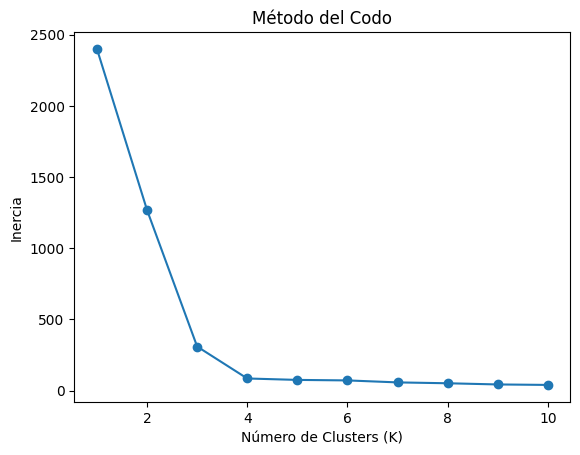

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Método del codo
inertia = []
k_range = range(1, 11)  # Probar de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.plot(k_range, inertia, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia")
plt.show()


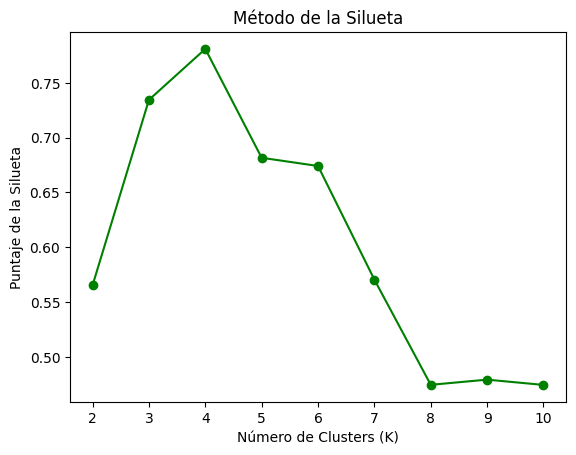

In [ ]:
from sklearn.metrics import silhouette_score

# Método de la silueta, comenzamos con k=2
silhouette_scores = []
k_range = range(2, 11)  # Evitamos k=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    score = silhouette_score(features_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Graficamos el análisis de la silueta
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Método de la Silueta")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Puntaje de la Silueta")
plt.show()



In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

k_optimal = 4
kmeans_sklearn = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_sklearn.fit(features_scaled)

# Obtenemos los centroides y las etiquetas
centroids_sklearn = kmeans_sklearn.cluster_centers_
labels_sklearn = kmeans_sklearn.labels_

# Visualizamos los resultados
print("Centroides de Scikit-Learn K-means con K=" + str(k_optimal) + ":")
print(centroids_sklearn)


Centroides de Scikit-Learn K-means con K=4:
[[-1.03220995  0.71464876]
 [-0.6499116  -1.55134314]
 [ 1.52542657 -0.13513258]
 [ 0.16522044  0.96899436]]


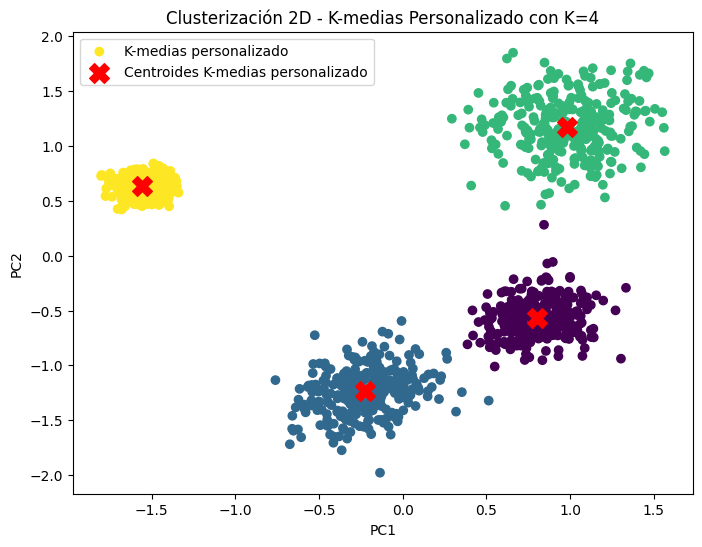

In [ ]:
# Creamos gráfico en 2D para K-medias personalizado: PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_kmeans_custom, cmap='viridis', marker='o', label='K-medias personalizado')
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], c='red', marker='X', s=200, label='Centroides K-medias personalizado')
plt.title("Clusterización 2D - K-medias Personalizado con K=4")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


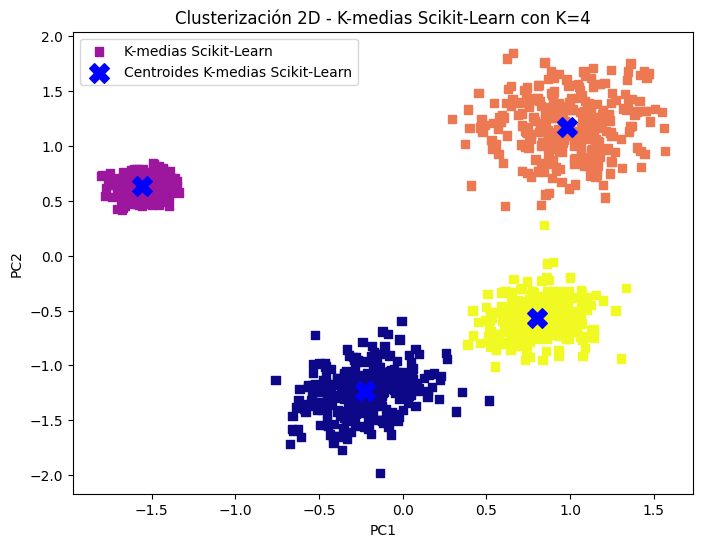

In [ ]:

# Creamos gráfico en 2D para K-medias de Scikit-Learn: PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_sklearn, cmap='plasma', marker='s', label='K-medias Scikit-Learn')
plt.scatter(pca.transform(centroids_sklearn)[:, 0], pca.transform(centroids_sklearn)[:, 1], c='blue', marker='X', s=200, label='Centroides K-medias Scikit-Learn')
plt.title("Clusterización 2D - K-medias Scikit-Learn con K=4")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



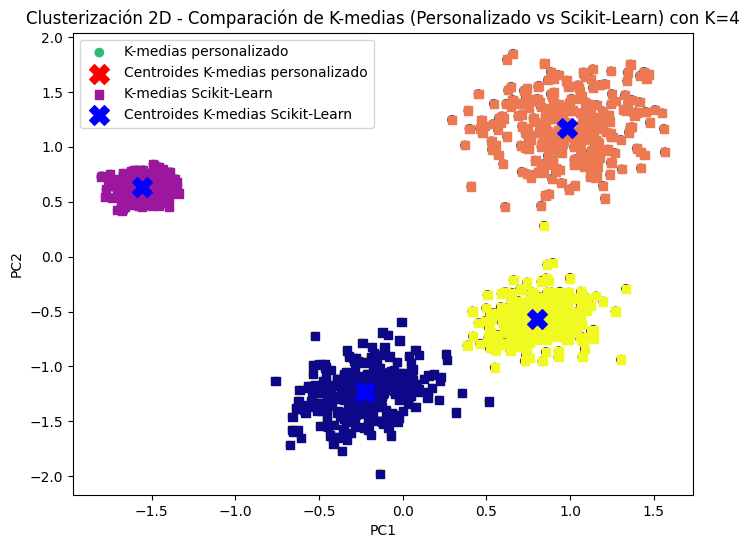

In [ ]:
# Creamos gráfico en 2D: PC1 vs PC2
plt.figure(figsize=(8, 6))

# Graficamos los puntos de datos del modelo personalizado
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_kmeans_custom, cmap='viridis', marker='o', label='K-medias personalizado')

# Graficamos los centroides del modelo personalizado
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1], c='red', marker='X', s=200, label='Centroides K-medias personalizado')

# Graficamos los puntos de datos del modelo de Scikit-Learn
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_sklearn, cmap='plasma', marker='s', label='K-medias Scikit-Learn')

# Graficamos los centroides del modelo de Scikit-Learn
plt.scatter(pca.transform(centroids_sklearn)[:, 0], pca.transform(centroids_sklearn)[:, 1], c='blue', marker='X', s=200, label='Centroides K-medias Scikit-Learn')

# Configuración de la gráfica
plt.title("Clusterización 2D - Comparación de K-medias (Personalizado vs Scikit-Learn) con K=4")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [ ]:
# Comparación de los centroides
print("Centroides del modelo K-medias personalizado:")
print(centroids)

print("\nCentroides del modelo K-medias de Scikit-Learn:")
print(centroids_sklearn)


Centroides del modelo K-medias personalizado:
[[ 0.16522044  0.96899436]
 [-1.03220995  0.71464876]
 [ 1.52542657 -0.13513258]
 [-0.6499116  -1.55134314]]

Centroides del modelo K-medias de Scikit-Learn:
[[-1.03220995  0.71464876]
 [-0.6499116  -1.55134314]
 [ 1.52542657 -0.13513258]
 [ 0.16522044  0.96899436]]
